# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.tail(25)

,city,date,fare,ride_id,driver_count,type
2350,Garzaport,5/6/2019 16:57,18.90,8.826700e+12,7,Rural
2351,South Saramouth,3/27/2019 21:07,11.87,1.703520e+11,7,Rural
2352,Randallchester,4/7/2019 23:42,10.79,1.615470e+12,9,Rural
2353,Harringtonfort,1/9/2019 15:30,31.84,3.730690e+12,4,Rural
2354,South Saramouth,4/12/2019 18:11,57.23,5.081200e+12,7,Rural
2355,North Holly,1/3/2019 19:51,19.90,5.559510e+12,8,Rural
2356,New Ryantown,5/5/2019 19:29,26.53,2.302210e+12,2,Rural
2357,West Heather,2/2/2019 6:28,53.07,2.462950e+12,4,Rural
2358,Lake Latoyabury,2/25/2019 4:10,16.18,8.492920e+12,2,Rural
2359,South Marychester,1/19/2019 11:40,49.44,9.005882e+10,1,Rural


## Deliverable 1: Get a Summary DataFrame 

In [22]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
#suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"].sum()
#rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"].sum()
#urban_ride_count, suburban_ride_count, rural_ride_count
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [23]:
# 2. Get the total drivers for each city type
#total_drivers_suburban = suburban_cities_df["driver_count"].count()
#total_drivers_rural = len((rural_cities_df[""]))
#total_drivers_rural = rural_cities_df["driver_count"].count()

#total_drivers_suburban = suburban_cities_df(["type"]).sum()["driver_count"]
total_drivers_count = city_data_df.groupby(["type"]).sum()["driver_count"]
#total_drivers_rural = city_data_df.groupby(["type"]).sum()["driver_count"]

total_drivers_count


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [29]:
#  3. Get the total amount of fares for each city type

total_fares_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [27]:
#  4. Get the average fare per ride for each city type. 

avg_fare_type = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [28]:
# 5. Get the average fare per driver for each city type. 

driver_fare_avg = type_fares_count / total_drivers_count
driver_fare_avg

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [32]:
###  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":type_ride_count, 
                                 "Total Drivers":total_drivers_count,
                                 "Total Fares":total_fares_count,
                                 "Average Faire Per Ride":avg_fare_type,
                                "Avg Fare Per Driver":driver_fare_avg})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Faire Per Rider,Avg Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [34]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [35]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Faire Per Rider,Avg Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [37]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Faire Per Ride"] = pyber_summary_df["Average Faire Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare Per Driver"] = pyber_summary_df["Avg Fare Per Driver"].map("${:,.2f}".format)
pyber_summary_df

ValueError: Unknown format code 'f' for object of type 'str'

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [ ]:
# 1. Read the merged DataFrame
pyber_summary_df

In [8]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_city = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_fare_city

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [9]:
## date data type
sum_fare_city.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2364 entries, ('Rural', '1/1/2019 9:45') to ('Urban', '5/8/2019 7:29')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fare    2364 non-null   float64
dtypes: float64(1)
memory usage: 44.0+ KB


In [10]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fare_city = pyber_data_df.groupby(['type', 'date'])[['fare']].sum()
sum_fare_city

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [11]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_fare_city = sum_fare_city.reset_index()


In [12]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fare_city_table = sum_fare_city.pivot(index="date", columns="type", values="fare")
sum_fare_city_table.index = pd.to_datetime(sum_fare_city_table.index)
sum_fare_city_table

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [13]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_location = sum_fare_city_table.loc['2019-01-01':'2019-04-29']
date_location


C:\Users\AlexPapa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [14]:
date_location.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [15]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
sum_fare_city['date'] = sum_fare_city['date'].astype('datetime64[ns]')

In [16]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_fare_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   type    2364 non-null   object        
 1   date    2364 non-null   datetime64[ns]
 2   fare    2364 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 55.5+ KB


In [17]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_sum_df = sum_fare_city_table.resample("W").sum()
weekly_sum_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [ ]:
weekly_sum_df.info()

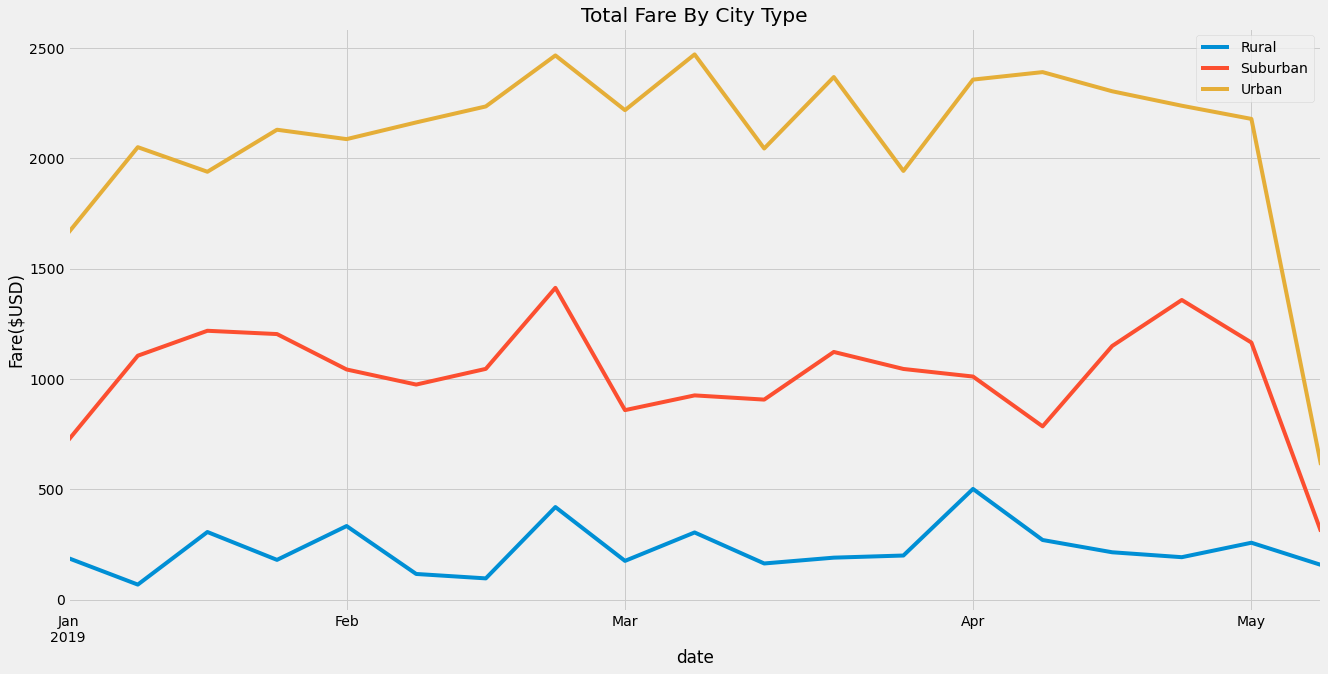

In [39]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_sum_df.plot(figsize=(20,10))
plt.ylabel("Fare($USD)")
plt.title("Total Fare By City Type")


#fig, ax1 = plt.subplots(figsize=(14, 6))

#ax1.set_ylabel("Fare($USD)")
#ax1.set_title("Total Fare By City Type")
#ax1.set_yticks(np.arange(0, 2501, step=500.0))
#ax1.set_xticks(np.arange(5, step=1))
#ax1.set_xticklabels(["Jan 2019", "Feb", "March", "April", ""])

#date = weekly_sum_df.index = pd.to_datetime(weekly_sum_df.index, )

##weekly_sum_df.plot['date'] = pd.to_datetime(weekly_sum_df.plot['date'])
#ax = plt.gca()
#ax =  weekly_sum_df.plot(kind='line', x= date, y='rural')




#ax1.plot(weekly_sum_df.index.values, weekly_sum_df['rural'])
#weekly_sum_df.plot(kind='scatter', x='date', y='urban',color='red')
#weekly_sum_df['date'] = pd.to_datetime(weekly_sum_df['date'])

#weekly_sum_df['date'] = pd.to_datetime(weekly_sum_df['date'])

plt.savefig("analysis/Fig8.png")

plt.legend()





